In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import scipy.stats

**Problema 1**

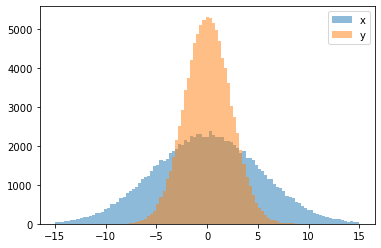

In [21]:

#Definición cadena de Markov
# def markov(beta,T,n):
#     """Parámetros:
#     beta: constante 
#     T: tiempo máximo de la simulación de la cadena de Markov
#     El método, a través de la cadena de markov definida por
#     x[t]=beta*x[t-1]+e_t con e_t distribuido normal(0,1)
#     genera un vector con n simulaciones del proceso."""
#     vect=np.zeros(n) #Resultado de la simulación
#     for j in range(n): #cada valor simulado
#         x=0
#         for i in range(T):
#             x=beta*x+ np.random.randn()
#         vect[j]=x
#     return vect                   Duda!! No son múltiples cadenas, sino una!?

def markov(beta,n):
    e=np.random.normal(0,1,n)
    x=[e[0]]
    for i in range(1,n):
        x.append(x[i-1]*beta+ e[i])
    return x

beta=0.9
n=100000
T=1000
muestra_comparativa=np.random.normal(0,1/(1-beta**2),size=n) #parece coincidir con 1/(1-beta**4)
muestra_simul=markov(beta,n)

bins = np.linspace(-15, 15, 100)

plt.hist(muestra_comparativa, bins, alpha=0.5, label='x')
plt.hist(muestra_simul, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()


Luego de varias pruebas no conseguimos hacer que coincidiera la distribución de la simulación con el muestreo comparativo. 


**Punto 2**

Al querer simular datos de una función $Beta(2,6)$, propongo la distribución $q(x)= Unif(0,1)$ que contiene el intervalo de definición de la función deseada para simular los $Y_t$. A partir de estos valores se establece la probabilidad $\rho(x,y)=min\{\frac{f(y)q(x|y)}{f(x)q(y|x)},1 \}$ y el proceso de Markov: $$ X_{t+1}= 
\begin{cases} 
Y_t & con probabilidad & \rho(x_t,Y_t)\\
X_t & con probabilidad & 1-\rho(x_t,Y_t) 
\end{cases}$$

C:\Users\marti\AppData\Local\Temp/ipykernel_21728/3026203765.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  rho=scipy.stats.beta.pdf(y_t,alfa,beta)/scipy.stats.beta.pdf(x[i-1],alfa,beta) #q(x) en este caso es 1


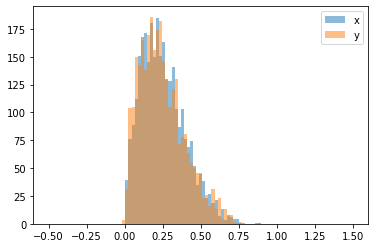

KstestResult(statistic=0.04133333333333333, pvalue=0.011881272113249542)

In [24]:
def probabilidad(p):
    """recibe p en intervalo [0,1] para hacer una prueba Bernoulli"""
    x=np.random.uniform()
    if x<=p:
        return True
    else:
        return False

# def metrop_hasting_beta(alfa,beta,T,n):
#     vect=np.zeros(n)
#     for j in range(n):
#         x=np.random.uniform()
#         for i in range(1,T):
#             y_t=np.random.uniform()
#             rho=scipy.stats.beta.pdf(y_t,alfa,beta)/scipy.stats.beta.pdf(x,alfa,beta) #q(x) en este caso es 1
#             x=y_t if probabilidad(rho) else x
#         vect[j]=x
#     return vect
def metrop_hasting_beta(alfa,beta,n):
    x=np.zeros(n)
    for i in range(1,n):
        y_t=np.random.uniform()
        rho=scipy.stats.beta.pdf(y_t,alfa,beta)/scipy.stats.beta.pdf(x[i-1],alfa,beta) #q(x) en este caso es 1
        x[i]=y_t if probabilidad(rho) else x[i-1]
    
    return x

n=3000
T=200
alfa=2
beta=6
muestra_comparativa=np.random.beta(alfa,beta,n) 
muestra_simul=metrop_hasting_beta(alfa,beta,n)

bins = np.linspace(-0.5,1.5 , 100)

plt.hist(muestra_comparativa, bins, alpha=0.5, label='x')
plt.hist(muestra_simul, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

scipy.stats.ks_2samp(muestra_comparativa,muestra_simul)


Debido al p valor de la prueba Kolmogorov Smirnov, concluimos que las muestras coinciden y provienen de una misma distribución.

**Problema 3**

Habiendo observado datos que provienen de una distribución dependiente de un parámetro $\theta$: $p(y|\theta)$, suponiendo una distribución a priori $p(\theta)$, sabemos por Bayes que su producto es proporcional a la distribución a posteriori $p(\theta|y)$. 

Al querer hacer muestras de esta distirbución a posteriori, hacemos uso del algoritmo de metropolis hasting. Conocemos la distribución $p(\theta|y)$ sólo por medio de la relación proporcional. Usamos la distribución $p(\theta)$ también como distribución candidata $q$ del algoritmo.

El algoritmo de Metropolis Hasting nos ayuda justamente a estimar de distribuciones objetivo que sólo conocemos bajo proporcionalidad (desconocemos la constante normalizadora: $p(y)$ en este caso). 

In [39]:

alfa=0.7
data_simulada=(1-alfa)*np.random.normal(7,0.5,100)+alfa*np.random.normal(10,0.5,100)
#suponiendo alfa distribuida Unif(0,1)  (equivalente a Beta(1,1))
#Sampleo de la distribución a posteriori
n=100
def likelihood(data_y):
    #p(y|theta)
    pass
def f():
    """Será el producto de la distr a priori con la distribución p(y|theta)"""
    pass

def metrop_hasting_beta(alfa,beta,n):
    x=np.zeros(n)
    for i in range(1,n):
        y_t=np.random.uniform()
        rho=f(y_t)*scipy.stats.beta.pdf(y_t,alfa,beta)/f(x[i-1])*scipy.stats.beta.pdf(x[i-1],alfa,beta) #q(x) en este caso es 1
        x[i]=y_t if probabilidad(rho) else x[i-1]
    
    return x
    
muestra_hast=metrop_hasting_beta(1,1,n)



2.117681999999998